<a href="https://colab.research.google.com/github/VellummyilumVinoth/Image_processing_using_Python/blob/main/Image_processing_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize the Data

We have to import matplotlib. It basically used to visualize the images. Instead of matplotlib we have use openCV as well.

Populating the interactive namespace from numpy and matplotlib


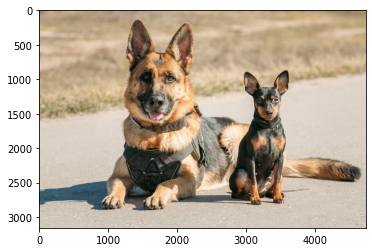

In [15]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/Dogs and Cats Datasets/test/dogs/dog_380.jpg')
imgplot = plt.imshow(img)
plt.show()

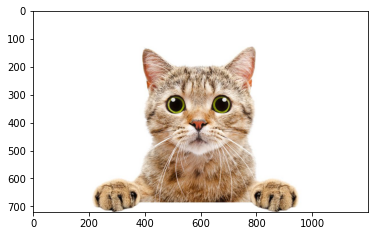

In [17]:
img = mpimg.imread('/content/drive/MyDrive/Dogs and Cats Datasets/test/cats/cat_106.jpg')
imgplot = plt.imshow(img)
plt.show()

# Import Libraries


We have use keras it is built top of tensorflow. Tensorflow and keras used for image processing. Recurrent neural network(RNN) and convolutional neural network(CNN) are part of the sequential model. Fully connected layer in keras is known as the dense layer. Covolutional 2D(Conv2D), Flatten, Dropout, MaxPooling2D,Activation layer also we have to import using keras. Dropout means preventing the data from overfitting the model. 

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
from tensorflow.keras.preprocessing import image

### Check the Tensorflow version

In [ ]:
print(tensorflow.__version__)

2.11.0


# Designing the Model

### Initialize the parameters

In [18]:
img_width, img_height = 150,150 #Width and height of the images
train_data_dir = r'/content/drive/MyDrive/Dogs and Cats Datasets/train' 
validation_data_dir = r'/content/drive/MyDrive/Dogs and Cats Datasets/test'
nb_train_sample = 100
nb_validation_sample = 100
epochs = 20
batch_size = 20

### Check the shape of the image
Two ways to represent the image data as a three dimensional array
1. Channels Last: Image data is represented in a three-dimensional array where the last channel represents the color channels, e.g. [rows][cols][channels].
2. Channels First: Image data is represented in a three-dimensional array where the first channel represents the color channels, e.g. [channels][rows][cols].

In [22]:
import tensorflow.keras.backend as k
if k.image_data_format() == 'channels_first':
  input_shape = (3, img_width,img_height)
else:
  input_shape = (img_width,img_height,3)


### Generate images to train the model
1. Rescale
2. Shear range
3. Zoom_range
4. Horizontal_flip

*   This class allows to configure random transformations and normalization on the allocated image during training time.
*   Prevents overfitting and helps to generate a generalize model.
*   Never repeats the exact same images twice to train our model.






In [25]:
train_datagen = ImageDataGenerator(rescale = 1. /255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1. /255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size = (img_width,img_height),batch_size = batch_size, class_mode = 'binary', classes = ['cats', 'dogs'])
#Now this, will generate training generator data
#Target_size = mentioned image_width and imgage_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary (because here only two classes are there to classify)

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size = (img_width, img_height), batch_size = batch_size, class_mode = 'binary')
#Now this, will generate testing generator data
#Target_size = mentioned image_width and imgage_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary (because here only two classes are there to classify)


Found 561 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


### Visual Representation of ImageDataGenerator



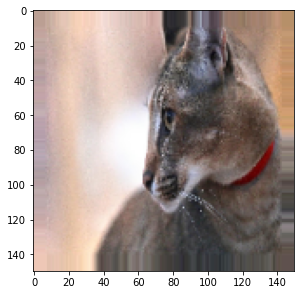

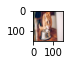

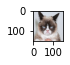

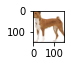

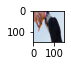

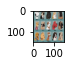

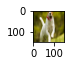

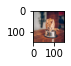

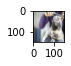

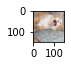

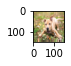

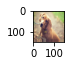

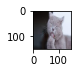

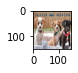

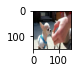

In [28]:
plt.figure(figsize = (12, 12))
for i in range(0, 15):
  plt.subplot(5, 3, i+1)
  for X_batch, Y_batch in train_generator:
    image = X_batch[0]
    plt.imshow(image)
    break
  plt.tight_layout()
  plt.show()


# Build the basic CNN model 0

### Layers in CNN:
1. Convolutional Layer:

    "Converts images into an array”

    *   First layer of CNN
    *   Stores the pixelated values of image into an array
    *   Used for extracting the features of the image and reducing its dimensionality

2. ReLu (Activation Function)

    “Converts negative values into zero”

    *  ReLU is a half rectifier
            f(y) = 0 when y < 0
            f(y) = y when y > = 0
    *  Range of ReLU : [0 to infinity]

3. Polling Layer

    “Reduces the spatial size and the numbers of parameters”
    *   Used to reduce dimensionality
    *   Helps to control overfitting
    *   Filters of size 2x2 are commonly used in it

4. Fully Connected Layer (Dense)

    “Combines all the features together to create a final model”
    *  Used to reduce dimensionality
    *  Helps to control overfitting
    *  Filters of size 2x2 are commonly used in it


*   Adding convolutional neural network in the model
*   add() - Helps to add layers in the model
*   Conv2D() - Convolutional layer (to extract features from the images)
*   Conv2D(32, (3,3), input_shape = input_shape)
    *   32 - Take 32 features from the given image
    *   (3,3) - Metrics size of the images(3*3)
    *   input_shape = image size
*   Activation function(relu) is added to remove the negative values


In [29]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape = input_shape)) # 64 neurons with 3*3 filter
# This class allows to create convolutional neural network to extract feature from the images

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2))) # MaxPooling2D helps to reduce the size of the data

model.add(Flatten()) # Converts multi dimensional array to 1D decimal
model.add(Dense(64)) # 64 neurons with 3*3 filter
# Numbers of output nodes in the hidden layer
model.add(Activation('relu'))
model.add(Dense(i)) # output layer
model.add(Activation('sigmoid')) # Sigmoid activation function
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        